In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import sys

In [2]:
sys.path.insert(0, os.path.abspath('..'))
from UKMovementSensing import hsmm

In [3]:
execfile('workflow/config.py')

## Load model

In [4]:
import pickle
with open(model_file, 'r') as f:
    model = pickle.load(file=f)

In [5]:
print(len(model.states_list))
print(len(model.stateseqs))
len(model.datas)

0
0


0

In [6]:
filenames = os.listdir(states_path)
filenames = [fn for fn in filenames if os.path.isfile(os.path.join(states_path,fn))]
filenames = [os.path.join(states_path,filename) for filename in filenames]

In [7]:
len(filenames)

1

In [8]:
datasets = [pd.read_csv(os.path.join(subset_path,fn), index_col='timestamp', parse_dates=True) for fn in filenames]
X_list = [d[column_names].as_matrix() for d in datasets]

In [9]:
predictions = []
for X in X_list:
    predictions.append(model.predict(X, 0))

In [10]:
print(len(model.states_list))
print(len(model.stateseqs))

0
0


In [11]:
old_pred = datasets[0]['state']
new_pred = predictions[0]

In [12]:
new_pred[1]

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [13]:
old_new = pd.DataFrame({'old': old_pred, 'new': new_pred[1]})
np.mean(old_new['old']!=old_new['new'])

0.017245370370370369

In [14]:
import matplotlib.pyplot as plt
data = datasets[0]

In [15]:
from matplotlib.colors import LinearSegmentedColormap
colormap, cmap = hsmm.get_color_map(Nmax+1)
cmap_states = LinearSegmentedColormap.from_list('name',
                                             [colormap[i] for i in range(Nmax)],
                                             Nmax)

(<matplotlib.figure.Figure at 0x7fd8cc482d50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd8cc49d150>)

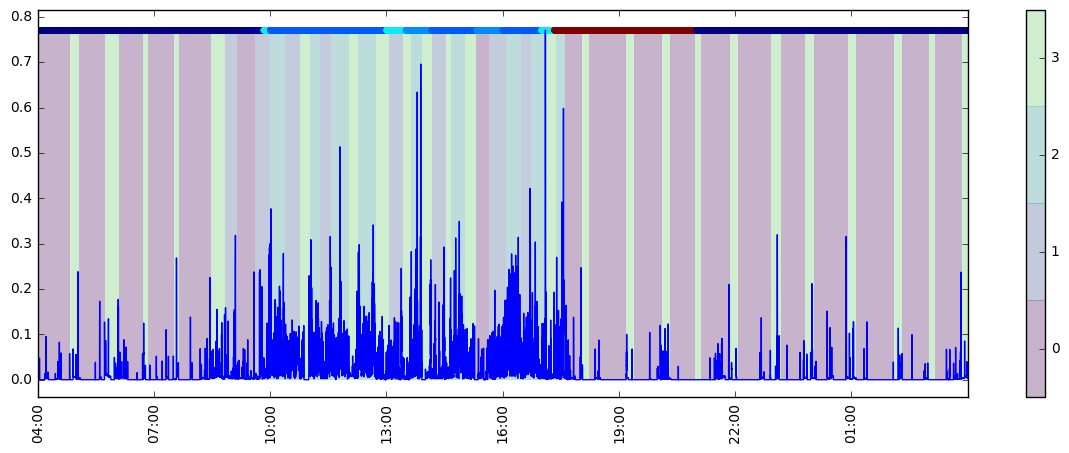

In [16]:
hsmm.plot_states_and_var_new(data, data['state'], columns=['acceleration',], by='activity', cmap=cmap_states)

(<matplotlib.figure.Figure at 0x7fd8c958e690>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd8c95faa90>)

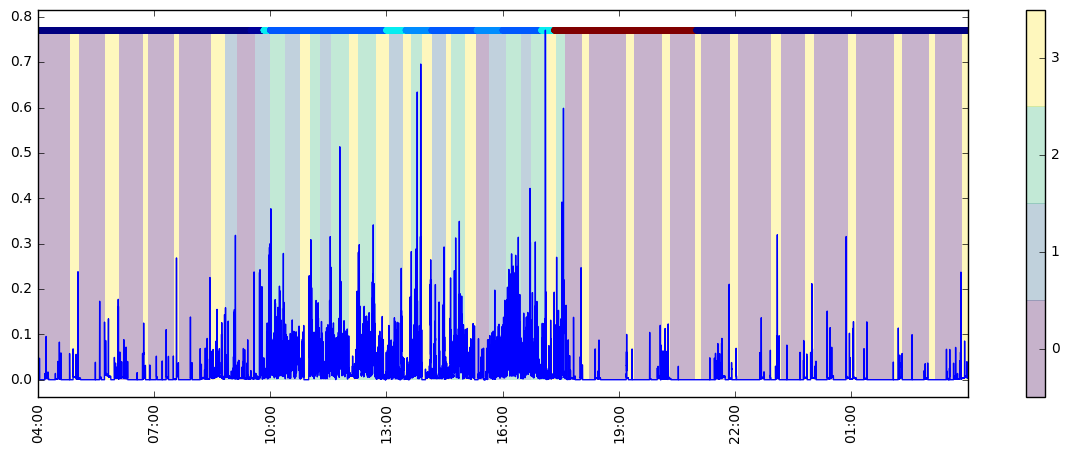

In [20]:
hsmm.plot_states_and_var_new(data, list(old_new['old']), columns=['acceleration',], by='activity')

(<matplotlib.figure.Figure at 0x7fd8c97c0210>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd8c96637d0>)

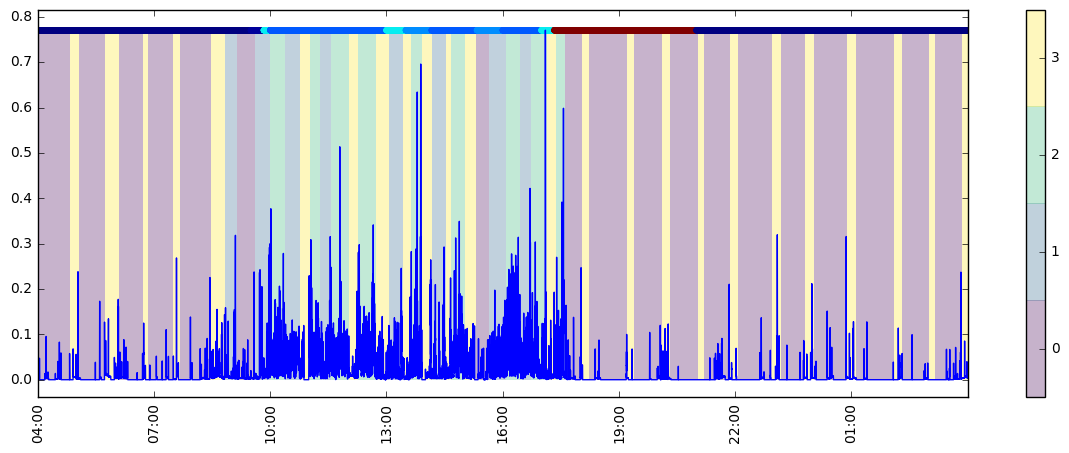

In [19]:
hsmm.plot_states_and_var_new(data, new_pred[1], columns=['acceleration',], by='activity')

In [ ]:
data

In [ ]:
data.shape

In [ ]:
data['state'].shape